# Исследование данных с полуфинала #

### Что тут можно предпринять? ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('ticks')

In [2]:
train = pd.read_excel('semifinal_data/train.xlsx')
test = pd.read_excel('semifinal_data/test.xlsx')
descr = pd.read_excel('semifinal_data/description.xlsx')

## Описание данных ##

In [3]:
descr.head(3)

,Название поля,Описание
0,Water_(g),Water (g/100 g)
1,Protein_(g),Protein (g/100 g)
2,Lipid_Tot_(g),Total lipid (fat)(g/100 g)


In [4]:
print('Число столбцов в трейне: ', train.shape[1])
print('Число столбцов в тесте: ', test.shape[1])
print('Число строк в описании: ', descr.shape[0])

Число столбцов в трейне:  52
Число столбцов в тесте:  51
Число строк в описании:  50


У нас есть два признака, лишенных описания. Что же это?

In [5]:
train_feat = set(train.columns)
test_feat = set(test.columns)
descr_feat = set(descr['Название поля'])

print('Есть в описании, нет в трейне: ', descr_feat.difference(train_feat))
print('Есть в описании, нет в тесте: ', descr_feat.difference(test_feat))
print('Есть в трейне, нет в описании: ', train_feat.difference(descr_feat))
print('Есть в тесте, нет в описании: ', test_feat.difference(descr_feat))
print('Есть в трейне, нет в тесте: ', train_feat.difference(test_feat))
print('Есть в тесте, нет в трейне: ', test_feat.difference(train_feat))

Есть в описании, нет в трейне:  set()
Есть в описании, нет в тесте:  set()
Есть в трейне, нет в описании:  {'Shrt_Desc', 'Energ_Kcal'}
Есть в тесте, нет в описании:  {'Shrt_Desc'}
Есть в трейне, нет в тесте:  {'Energ_Kcal'}
Есть в тесте, нет в трейне:  set()


Итак, все фичи кроме названия продукта и целевой переменной имеют свое описание. Без странностей.

Посмотрим на описание фичей.

In [6]:
pd.set_option('display.max_columns', None)  
descr

,Название поля,Описание
0,Water_(g),Water (g/100 g)
1,Protein_(g),Protein (g/100 g)
2,Lipid_Tot_(g),Total lipid (fat)(g/100 g)
3,Ash_(g),Ash (g/100 g)
4,Carbohydrt_(g),Carbohydrate by difference (g/100 g)
5,Fiber_TD_(g),Total dietary fiber (g/100 g)
6,Sugar_Tot_(g),Total sugars (g/100 g)
7,Calcium_(mg),Calcium (mg/100 g)
8,Iron_(mg),Iron (mg/100 g)
9,Magnesium_(mg),Magnesium (mg/100 g)


In [7]:
print(descr[descr['Название поля'] == 'GmWt_1']['Описание'])

45    First household weight for this item from the 
Name: Описание, dtype: object


Итак, большинство признаков - это просто содержание определенных элементов в продукте на 100 грамм. Выбиваются только последние несколько.
* GmWt_1 - здесь вообще описание не дописано. Хрен знает, что оно вообще значит. Кажется, оно должно быть таким же как в GmWt_2, но это не особо вносит понимание.
* GmWt_2, GmWt_Desc1, GmWt_Desc2 - это что вообще? Непонятно.
* Refuse_Pct - процент отказов от чего?

In [8]:
train[['GmWt_1', 'GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct']].head(5)

,GmWt_1,GmWt_2,GmWt_Desc1,GmWt_Desc2,Refuse_Pct
0,2.0,15.0,1 tbsp,.5 oz,0.0
1,146.0,33.0,1 cup,1 piece,0.0
2,89.0,85.0,1 thigh,"1 serving, (3 oz)",29.0
3,140.0,85.0,1 cup,3 oz,27.0
4,14.0,238.0,1 tbsp,1 cup,0.0


Похоже, что GmWt_Desc1 и GmWt_Desc2 - это порции? неясно

## Смотрим на данные ##

In [9]:
print('Размер трейна: ', train.shape)
train.head()

Размер трейна:  (7756, 52)


,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,118.0,444.0,731.0,6.0,1.90,0.391,NaN,20.5,4.7,3.600,3.710,20.110,NaN,0.423,19.0,0.0,19.0,19.0,28.7,0.22,69.0,3.0,0.0,27.0,28.0,0.0,0.0,157.0,5.00,0.0,0.0,3.0,1.267,1.429,2.186,0.0,2.0,1 tbsp,15.0,.5 oz,0.0
1,"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,38.0,65.0,177.0,426.0,1.15,0.133,1.394,0.7,7.9,0.011,0.057,0.437,0.126,0.022,39.0,0.0,39.0,39.0,NaN,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.130,0.103,0.202,0.0,146.0,1 cup,33.0,1 piece,0.0
2,"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,21.0,217.0,264.0,337.0,2.01,0.084,0.018,27.0,0.0,0.055,0.233,5.433,1.262,0.176,12.0,0.0,12.0,12.0,67.9,0.45,45.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.25,NaN,NaN,0.0,2.866,4.878,1.673,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0
3,"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,14.0,221.0,258.0,1072.0,2.51,0.113,0.024,33.6,0.0,0.612,0.190,4.127,0.559,0.280,3.0,0.0,3.0,3.0,79.8,0.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.7,29.0,0.0,7.670,10.140,2.320,58.0,140.0,1 cup,85.0,3 oz,27.0
4,"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,1.0,4.0,2.0,2.0,0.01,0.006,0.055,0.5,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,14.0,1 tbsp,238.0,1 cup,0.0


In [10]:
print('Размер теста: ', test.shape)
test.head()

Размер теста:  (862, 51)


,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,SILK KEY LIME SOY YOGURT,77.59,2.35,1.18,1.24,17.65,0.6,12.35,176.0,0.64,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,17.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,170.0,1 container,NaN,NaN,0.0
1,"FAST FOODS,SALAD,VEG,TOSSED,WO/DRSNG",95.51,1.25,0.07,0.53,3.22,NaN,NaN,13.0,0.63,11.0,39.0,172.0,26.0,0.21,0.050,0.147,0.4,23.2,0.030,0.050,0.550,0.120,0.080,37.0,0.0,37.0,37.0,NaN,0.0,1136.0,57.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010,0.004,0.034,0.0,104.0,.75 cup,207.0,1.5 cup,0.0
2,"CUTTLEFISH,MXD SP,CKD,MOIST HEAT",61.12,32.48,1.40,3.36,1.64,0.0,NaN,180.0,10.84,60.0,580.0,637.0,744.0,3.46,0.998,0.209,89.6,8.5,0.017,1.729,2.189,0.900,0.270,24.0,0.0,24.0,24.0,NaN,5.4,675.0,203.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236,0.162,0.268,224.0,85.0,3 oz,NaN,NaN,0.0
3,"GROUND TURKEY,93% LN,7% FAT,RAW",72.63,18.73,8.34,0.92,0.00,0.0,0.00,21.0,1.17,21.0,193.0,213.0,69.0,2.53,0.107,0.008,19.0,0.0,0.067,0.185,5.417,1.000,0.350,7.0,0.0,7.0,7.0,53.0,1.2,73.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.11,0.4,14.0,0.0,2.170,2.843,2.537,74.0,28.0,1 oz,453.0,1 lb,0.0
4,"TURKEY,RTL PARTS,ENHANCED,BREAST,MEAT ONLY,CKD...",69.99,27.94,2.08,1.40,0.00,0.0,0.00,15.0,0.59,27.0,219.0,264.0,184.0,1.33,0.057,0.006,28.9,0.0,0.045,0.195,11.500,0.965,0.734,9.0,0.0,9.0,9.0,74.0,0.3,8.0,3.0,3.0,0.0,0.0,0.0,0.0,5.0,0.08,0.1,6.0,0.0,0.428,0.670,0.668,74.0,85.0,3 oz,852.0,1 breast,24.0


Ну хоть данных достаточно много.

### Названия продуктов ###

In [11]:
train['Shrt_Desc'][:10]

0                   BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY
1                                HEARTS OF PALM,CANNED
2    CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD...
3              PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD
4                                    VINEGAR,DISTILLED
5                  BEEF,NZ,IMP,TENDERLOIN,LN & FAT,RAW
6    MUFFINS,BLUEBERRY,PREP FROM RECIPE,MADE W/LOFA...
7                                         PHYLLO DOUGH
8    TURKEY,LT OR DK MEAT,SMOKED,CKD,W/SKN,BONE REM...
9         CEREALS RTE,QUAKER,SHREDDED WHEAT,BAGGED CRL
Name: Shrt_Desc, dtype: object

Мда, названия офигенные, только нейросети на них обучай (сарказм). Можно, конечно, попробовать как-то их обработать, но я не очень понимаю как. Кажется, что для решения первой дополнительной задачи (про классификацию) они играют решающую роль, потому что иначе черт знает, что делать, но мне страшно с этим работать.

Посмотрим на то, сколько раз здесь встречается каждое слово.

In [12]:
names = list(train['Shrt_Desc'].values) + list(test['Shrt_Desc'].values)
names = [el.lower() for el in names]
names = [''.join([el if ord(el) >= 97 and ord(el) <= 122 else ' ' for el in one]) for one in names]
words = []
for el in names:
    words += el.split()
print(len(words))
words[:10]

59918


['babyfood',
 'crl',
 'oatmeal',
 'w',
 'bananas',
 'dry',
 'hearts',
 'of',
 'palm',
 'canned']

Построим график встречаемости слов:

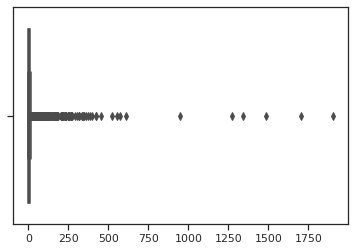

In [13]:
from collections import Counter

counter = Counter(words)
times = [el[1] for el in counter.items()]
sns.boxplot(times)

Да, как-то так себе. Некоторые слова прямо очень частые, но это редкость.

In [14]:
pd_times = pd.Series(times)
pd_times.describe()

count    3596.000000
mean       16.662403
std        73.084618
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max      1902.000000
dtype: float64

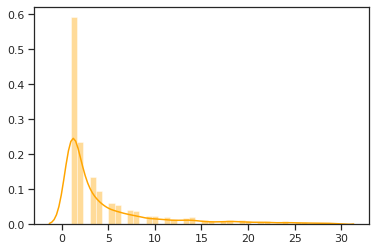

In [15]:
sns.distplot(pd_times[pd_times < 30], color='orange')

Ну собственно да, среднее количество повторений слова - 16, но 75% вообще встречаются меньше 8 раз, а 50% - меньше 3. Больше всего, соответственно, появляются лишь один раз.

Что с этим делать - хз.

### Целевая переменная ###

In [16]:
train['Energ_Kcal'].describe()

count    7756.000000
mean      225.885250
std       169.854878
min         0.000000
25%        91.000000
50%       190.000000
75%       336.000000
max       902.000000
Name: Energ_Kcal, dtype: float64

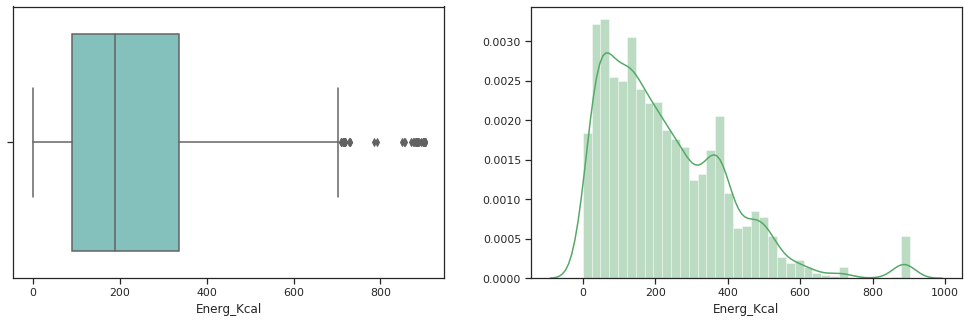

In [17]:
f, axes = plt.subplots(1, 2, figsize=(17, 5))
sns.boxplot(data = train, x = 'Energ_Kcal', palette = 'GnBu', ax=axes[0])
sns.distplot(train['Energ_Kcal'],ax= axes[1], color='g')

Похоже, распределение целевой переменной очень сильно скошенное. Возможно, нужно будет его нормализовать.

### Что там по NaNам? ###

In [18]:
train.isna().sum().describe()

count      52.000000
mean     1270.750000
std      1171.845869
min         0.000000
25%       312.750000
50%       668.000000
75%      1928.750000
max      3661.000000
dtype: float64

Нормально у них тут с NaNами. Во всем трейне 8к строк, а число пропущенных значений в столбце доходит до 3.5к. Непорядок.

In [19]:
print('Лидирующие по NaNам столбцы:')
temp = train.isna().sum().sort_values(ascending=False)
temp[:10]

Лидирующие по NaNам столбцы:


Choline_Tot_ (mg)    3661
GmWt_Desc2           3439
GmWt_2               3439
Vit_K_(µg)           3281
Lut+Zea_ (µg)        3077
Lycopene_(µg)        3055
Beta_Crypt_(µg)      3032
Alpha_Carot_(µg)     3024
Vit_D_µg             2967
Vit_D_IU             2966
dtype: int64

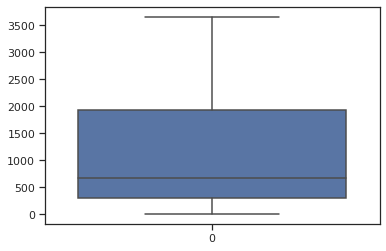

In [20]:
sns.boxplot(data=temp)

Ужас.

### Корреляции ###

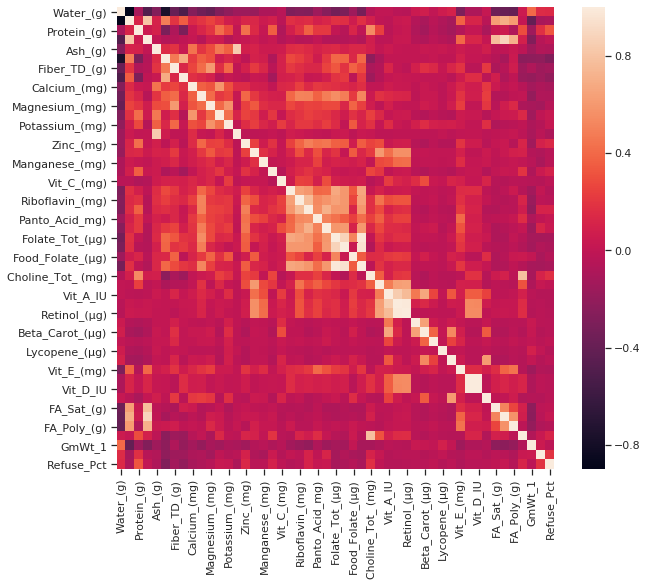

In [21]:
plt.figure(figsize=(9.8,8.5))
sns.heatmap(train.corr());

Это не очень функциональная, но красивая картинка с корреляциями. Кажется, что особенно коррелирующих признаков нет, давайте разбираться.

In [22]:
corrs = train.corr()
corcols = corrs.columns

corlist = []
for i, col1 in enumerate(corcols):
    for col2 in corcols[i + 1:]:
        corlist.append((corrs[col1][col2], col1 + '@' + col2, abs(corrs[col1][col2])))
        
corlist = sorted(corlist, key=lambda x: x[2], reverse=True)

In [23]:
cordf = pd.DataFrame({'one': [el[1].split('@')[0] for el in corlist], 'other': \
                      [el[1].split('@')[1] for el in corlist], 'corr': [el[0] for el in corlist], \
                     'abs_corr': [el[2] for el in corlist]})
print('Наиболее коррелирующие признаки: ')
cordf.head(10)

Наиболее коррелирующие признаки: 


,one,other,corr,abs_corr
0,Vit_D_µg,Vit_D_IU,0.999988,0.999988
1,Vit_A_RAE,Retinol_(µg),0.990264,0.990264
2,Folate_Tot_(µg),Folate_DFE_(µg),0.982813,0.982813
3,Folic_Acid_(µg),Folate_DFE_(µg),0.951884,0.951884
4,Water_(g),Energ_Kcal,-0.898171,0.898171
5,Lipid_Tot_(g),FA_Mono_(g),0.888518,0.888518
6,Folate_Tot_(µg),Folic_Acid_(µg),0.878953,0.878953
7,Vit_A_IU,Vit_A_RAE,0.843928,0.843928
8,Ash_(g),Sodium_(mg),0.842461,0.842461
9,Energ_Kcal,Lipid_Tot_(g),0.809028,0.809028


Как видим, есть признаки с довольно сильной корреляцией, хотя их не так много.

In [24]:
cordf['abs_corr'].describe()

count    1176.000000
mean        0.135519
std         0.165422
min         0.000013
25%         0.027471
50%         0.073372
75%         0.172389
max         0.999988
Name: abs_corr, dtype: float64

Ну да, большая часть признаков имеет между собой абсолютную корреляцию меньше 20%, даже график строить неинтересно. Но я построю!

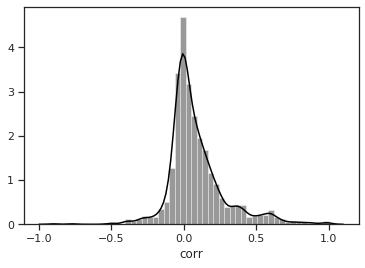

In [25]:
sns.distplot(cordf['corr'], color='black')

В основном данные не коррелируют. Интересно, что пар с положительной корреляцией больше, чем с отрицательной.

Посмотрим на корреляции с целевой переменной.

In [26]:
targetcor = cordf[(cordf['one'] == 'Energ_Kcal') | (cordf['other'] == 'Energ_Kcal')]
targetcor.head(15)

,one,other,corr,abs_corr
4,Water_(g),Energ_Kcal,-0.898171,0.898171
9,Energ_Kcal,Lipid_Tot_(g),0.809028,0.809028
17,Energ_Kcal,FA_Mono_(g),0.694226,0.694226
27,Energ_Kcal,FA_Sat_(g),0.625742,0.625742
29,Energ_Kcal,FA_Poly_(g),0.611080,0.611080
68,Energ_Kcal,Carbohydrt_(g),0.483376,0.483376
92,Energ_Kcal,GmWt_1,-0.403398,0.403398
108,Energ_Kcal,Vit_E_(mg),0.374964,0.374964
123,Energ_Kcal,Sugar_Tot_(g),0.350955,0.350955
184,Energ_Kcal,Magnesium_(mg),0.255336,0.255336


Есть лишь несколько столбцов со значимой корреляцией - содержание воды (предсказуемо), жиров (еще более предсказуемо), и еще каких-то соединений.

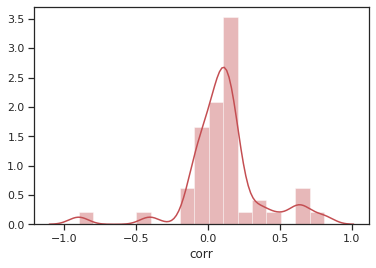

In [27]:
sns.distplot(targetcor['corr'], color='r')

### Вот эти странные признаки в конце ###

In [28]:
train['GmWt_1'].describe()

count    7537.000000
mean       95.962319
std        83.914099
min         0.000000
25%        28.000000
50%        85.000000
75%       132.000000
max      1171.000000
Name: GmWt_1, dtype: float64

Что это вообще? Непонято.

Посмотрим на GmWt_Desc1.

In [29]:
print('Уникальных значений: ', train['GmWt_Desc1'].nunique())
print('Наиболее частые: ')
train['GmWt_Desc1'].value_counts()[:7]

Уникальных значений:  849
Наиболее частые: 


3 oz         1218
1 cup        1063
1 oz          808
1 tbsp        307
1 serving     261
1 fl oz       239
.5 cup        109
Name: GmWt_Desc1, dtype: int64

Кажется, здесь везде формат - число объектов и сам объект. Посмотрим, что за объекты.

In [30]:
objs = train['GmWt_Desc1'].apply(lambda x: ' '.join(str(x).split()[1:]))
print('Уникальных значений: ', objs.nunique())
print('Наиболее частые: ')
objs.value_counts()[:10]

Уникальных значений:  694
Наиболее частые: 


oz                       2164
cup                      1227
tbsp                      333
fl oz                     285
serving                   261
                          218
cup, (1 NLEA serving)     191
cookies                   111
slice                      81
serving, 1/2 cup           79
Name: GmWt_Desc1, dtype: int64

Очень интересно, ничего не понятно.

In [31]:
train['GmWt_Desc2'].head()

0                 .5 oz
1               1 piece
2    1 serving,  (3 oz)
3                  3 oz
4                 1 cup
Name: GmWt_Desc2, dtype: object

Здесь опять все то же самое.

### Посмотрим на кластеры там какие-нибудь ###

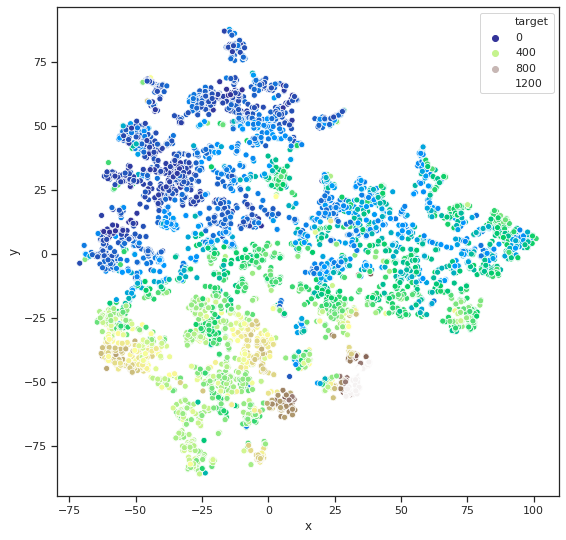

In [32]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

train_red = train.drop(['Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2', 'Energ_Kcal'], axis=1)
for col in train_red.columns:
    train_red[col].fillna(train_red[col].median(), inplace=True)
train_red = StandardScaler().fit_transform(train_red)

embedding = TSNE(n_components=2, perplexity=40, early_exaggeration=20.).fit_transform(train_red)

trainemb = pd.DataFrame(embedding)
trainemb.columns = ['x', 'y']
trainemb['target'] = train['Energ_Kcal']

plt.figure(figsize=(9, 9))
sns.scatterplot(data=trainemb, x='x', y='y', hue='target', palette='terrain')
plt.show()

Выглядит довольно разумно.

Также посмотрим на кластеры по некоторым парам признаков.

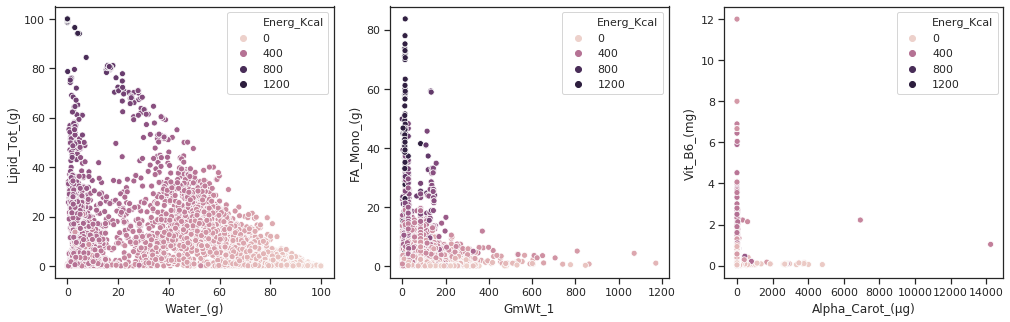

In [33]:
f, axes = plt.subplots(1, 3, figsize=(17, 5))

sns.scatterplot(data=train, x='Water_(g)', y='Lipid_Tot_(g)', hue='Energ_Kcal', ax=axes[0])
sns.scatterplot(data=train, x='GmWt_1', y='FA_Mono_(g)', hue='Energ_Kcal', ax=axes[1])
sns.scatterplot(data=train, x='Alpha_Carot_(µg)', y='Vit_B6_(mg)', hue='Energ_Kcal', ax=axes[2])

Наверное, рассматривая эти картинки, можно много интересных паттернов найти, вот только это бессмысленно.

### Хм, может, тут есть какой-нибудь лик? ###

Посмотрим, не будет ли где-нибудь корреляции с индексами.

In [44]:
train2 = train.copy()
train2['index'] = train2.index

cormap = train2.corr()
print(cormap['index'].describe())

cormap['abs_cor'] = cormap['index'].apply(abs)
cormap.sort_values('abs_cor', inplace=True, ascending=False)

cormap['index'].head()

count    50.000000
mean      0.023871
std       0.141407
min      -0.021033
25%      -0.004907
50%       0.002150
75%       0.011692
max       1.000000
Name: index, dtype: float64


index             1.000000
GmWt_2            0.033742
Fiber_TD_(g)      0.029149
Lut+Zea_ (µg)     0.028007
Carbohydrt_(g)    0.022885
Name: index, dtype: float64

Нет, судя по всему, особой корреляции с индексом нет.

### Сравнение распределений в трейне и тесте ###

Будет неловко, если вдруг окажется, что трейн и тест имеют разные распределения. Попробуем обучить модель, которая будет предсказывать, пришла строка из трейна или из теста.

Составим датасет из числовых признаков.

In [71]:
use_cols = list(set(test.columns) - {'GmWt_1', 'GmWt_2', 'GmWt_Desc1', 'GmWt_Desc2', 'Shrt_Desc'})

train_red = train[use_cols]
train_red['in_train'] = 1
test_red = test[use_cols]
test_red['in_train'] = 0

data = pd.concat([train_red, test_red])
data.head()

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sugar_Tot_(g),Magnesium_(mg),Carbohydrt_(g),Niacin_(mg),Beta_Crypt_(µg),Folate_DFE_(µg),FA_Poly_(g),Folate_Tot_(µg),Potassium_(mg),Thiamin_(mg),Ash_(g),Vit_E_(mg),Folic_Acid_(µg),Protein_(g),Sodium_(mg),FA_Sat_(g),Retinol_(µg),Vit_A_RAE,Zinc_(mg),Riboflavin_(mg),Vit_D_IU,Choline_Tot_ (mg),Iron_(mg),Phosphorus_(mg),Fiber_TD_(g),Calcium_(mg),FA_Mono_(g),Lut+Zea_ (µg),Cholestrl_(mg),Refuse_Pct,Panto_Acid_mg),Vit_D_µg,Selenium_(µg),Manganese_(mg),Beta_Carot_(µg),Alpha_Carot_(µg),Vit_C_(mg),Vit_B6_(mg),Food_Folate_(µg),Vit_K_(µg),Lipid_Tot_(g),Lycopene_(µg),Water_(g),Vit_B12_(µg),Vit_A_IU,Copper_mg),in_train
0,13.75,118.0,73.40,20.110,0.0,19.0,2.186,19.0,731.0,3.600,3.90,5.00,0.0,12.00,6.0,1.267,0.0,3.0,1.90,3.710,0.0,28.7,47.50,444.0,5.2,651.0,1.429,157.0,0.0,0.0,NaN,0.0,20.5,NaN,28.0,27.0,4.7,0.423,19.0,3.0,6.00,0.0,4.70,0.22,69.0,0.391,1
1,NaN,38.0,4.62,0.437,NaN,39.0,0.202,39.0,177.0,0.011,2.04,NaN,0.0,2.52,426.0,0.130,0.0,0.0,1.15,0.057,0.0,NaN,3.13,65.0,2.4,58.0,0.103,NaN,0.0,0.0,0.126,0.0,0.7,1.394,NaN,NaN,7.9,0.022,39.0,NaN,0.62,NaN,90.20,0.00,0.0,0.133,1
2,0.00,21.0,0.00,5.433,0.0,12.0,1.673,12.0,264.0,0.055,1.56,0.25,0.0,24.06,337.0,2.866,13.0,13.0,2.01,0.233,NaN,67.9,0.97,217.0,0.0,13.0,4.878,0.0,130.0,29.0,1.262,NaN,27.0,0.018,0.0,0.0,0.0,0.176,12.0,0.0,11.09,0.0,63.89,0.45,45.0,0.084,1
3,0.00,14.0,0.00,4.127,0.0,3.0,2.320,3.0,258.0,0.612,3.51,0.24,0.0,20.43,1072.0,7.670,0.0,0.0,2.51,0.190,29.0,79.8,0.95,221.0,0.0,10.0,10.140,0.0,58.0,27.0,0.559,0.7,33.6,0.024,0.0,0.0,0.0,0.280,3.0,0.0,21.35,0.0,54.73,0.93,0.0,0.113,1
4,0.04,1.0,0.04,0.000,0.0,0.0,0.000,0.0,2.0,0.000,0.02,0.00,0.0,0.00,2.0,0.000,0.0,0.0,0.01,0.000,0.0,0.0,0.03,4.0,0.0,6.0,0.000,0.0,0.0,0.0,0.000,0.0,0.5,0.055,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,94.78,0.00,0.0,0.006,1


Нормализуем, заполним NaNы и обучим xgboost.

In [72]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].median())
in_train = data['in_train'].values
    
data = pd.DataFrame(StandardScaler().fit_transform(data.values), columns=data.columns)
data['in_train'] = in_train

In [75]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(data.drop('in_train', axis=1), data['in_train'], 
                                                   shuffle=True, stratify=data['in_train'])

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
print('Доля правильных ответов: ', accuracy_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_proba[:,1]))

Доля правильных ответов:  0.8997679814385151
ROC AUC:  0.5284188585181365


ROC AUC $\approx 0.5$, а доля правильных ответов примерно совпадает с отношением трейна к тесту, так что распределения, судя по всему, одинаковые.

In [110]:
embedding = TSNE(n_components=2).fit_transform(data.drop('in_train', axis=1))

trainemb = pd.DataFrame(embedding)
trainemb.columns = ['x', 'y']
trainemb['target'] = data['in_train']

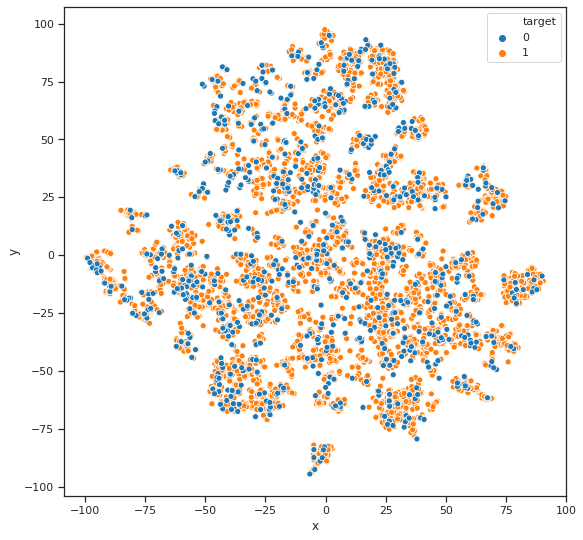

In [111]:
plt.figure(figsize=(9, 9))
sns.scatterplot(data=trainemb, x='x', y='y', hue='target', palette='tab10')
plt.show()

Да, распределения одинаковые (совсем-совсем).